In [8]:
import json
import torch
import pickle
import torch.nn.functional as F

In [2]:
probe_weights_path = "/workspace/deception-detection/results/repe_clean_all_layers_lr__repe_honesty__plain__llama-70b-3.3__20251214_114321/detector.pt"

with open(probe_weights_path, "rb") as f:
    probe_weights = pickle.load(f)

In [9]:
x = probe_weights["directions"]

In [10]:
cos_sim = torch.zeros(80, 80)

for i in range(80):
    for j in range(80):
        cos_sim[i, j] = F.cosine_similarity(
            x[i].unsqueeze(0),
            x[j].unsqueeze(0),
            dim=1
        )

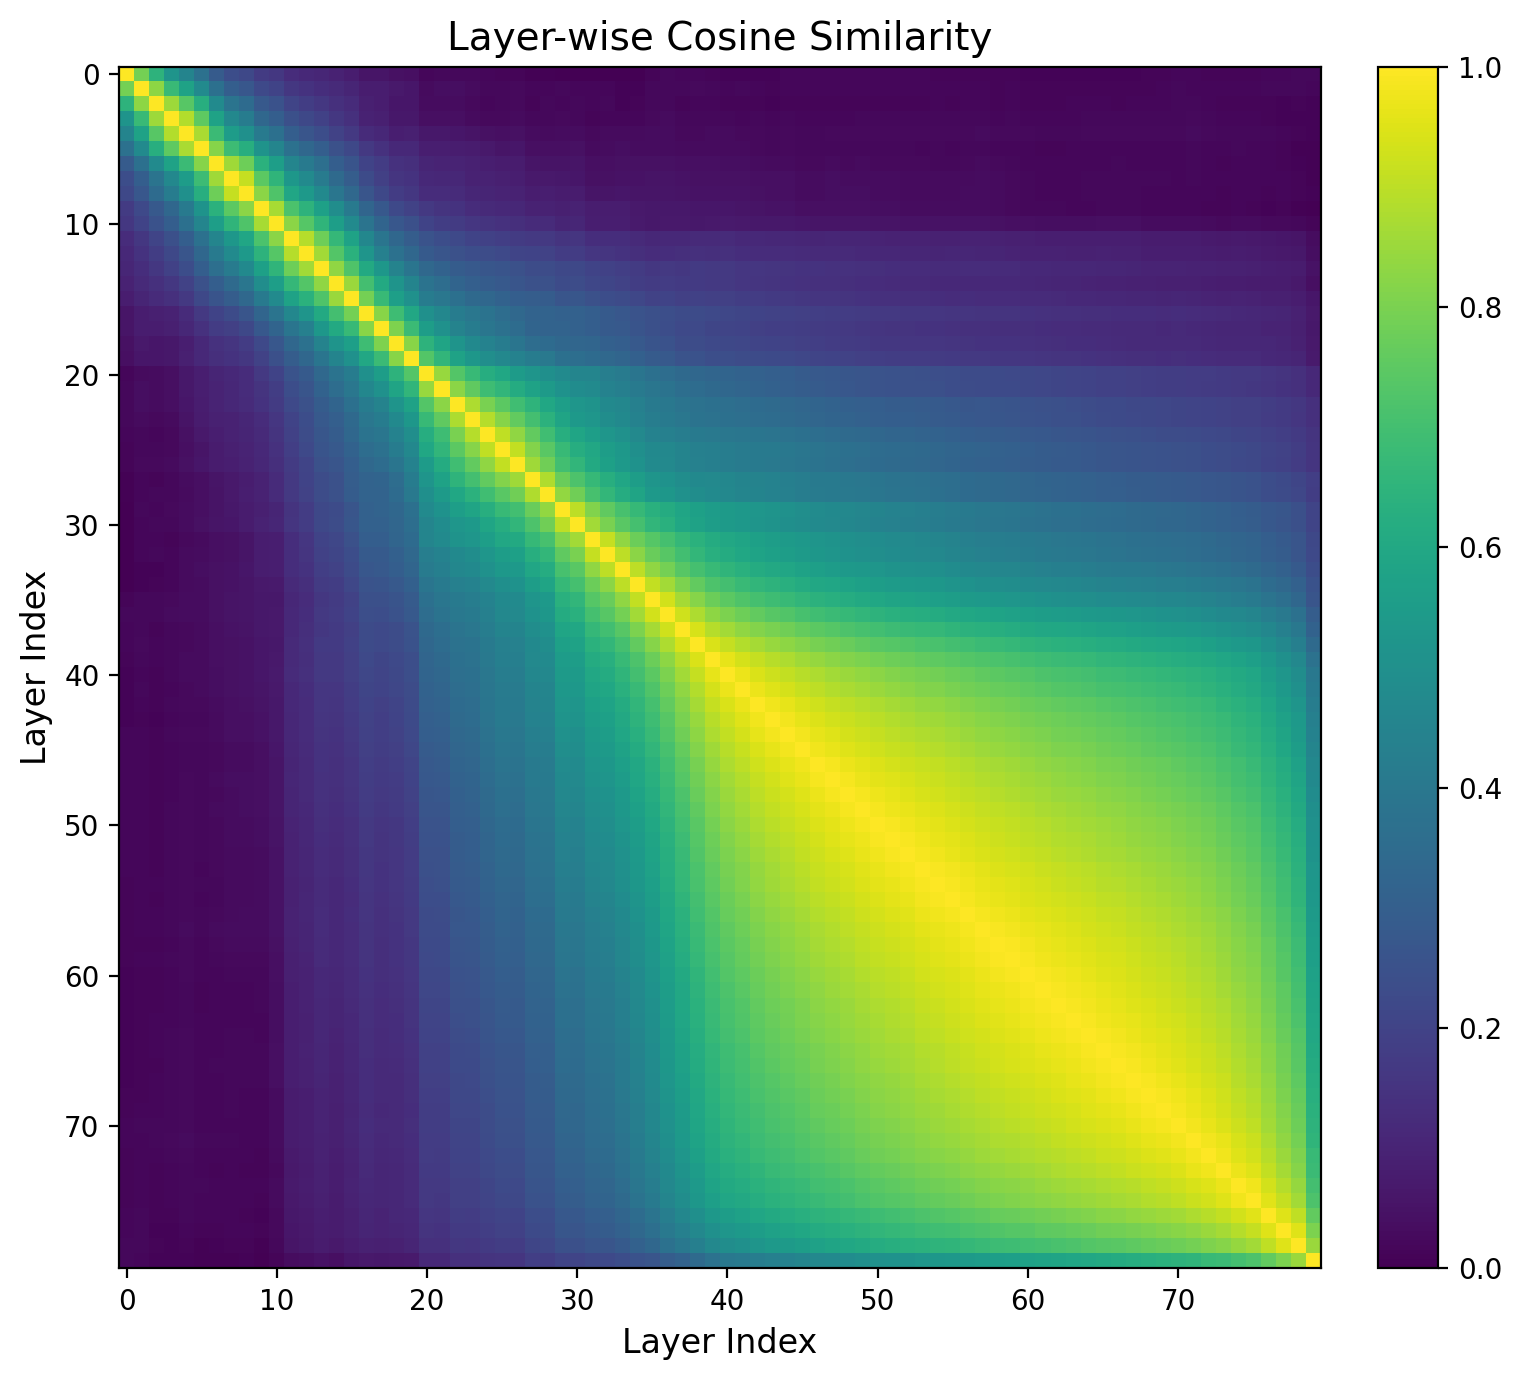

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Convert to numpy if needed
cos_sim_np = cos_sim.detach().cpu().numpy()

plt.figure(figsize=(8, 7), dpi=200)

im = plt.imshow(
    cos_sim_np,
    cmap="viridis",
    vmin=cos_sim_np.min(),
    vmax=cos_sim_np.max(),
    interpolation="nearest",
    aspect="equal"
)

plt.colorbar(im, fraction=0.046, pad=0.04)

plt.title("Layer-wise Cosine Similarity", fontsize=14)
plt.xlabel("Layer Index", fontsize=12)
plt.ylabel("Layer Index", fontsize=12)

plt.xticks(np.arange(0, 80, 10))
plt.yticks(np.arange(0, 80, 10))

plt.tight_layout()
plt.show()